In [25]:
import pandas as pd

In [26]:
# df_ndcgs = pd.read_csv('control_vs_show-v1_queries_ndcg_difference_tables_with_v0v2.csv')
df_toptorsotail = pd.read_csv('top_searched_queries_stats_with_v0v3.csv')

In [27]:
# len(df_ndcgs)

In [28]:
# df_ndcgs = df_ndcgs.dropna()

In [29]:
# len(df_ndcgs)

In [30]:
len(df_toptorsotail)

3001

In [32]:
df_toptorsotail = df_toptorsotail.dropna()

In [33]:
len(df_toptorsotail)

1132

In [34]:
# df_ndcgs['v0_l2s'] = df_ndcgs['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
# df_ndcgs['v2_l2s'] = df_ndcgs['v2_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

In [35]:
df_toptorsotail['v0_l2s'] = df_toptorsotail['v0_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))
df_toptorsotail['v3_l2s'] = df_toptorsotail['v3_category_paths'].apply(lambda x: [' > '.join(i.split(' > ')[:2]) for i in eval(x)] if isinstance(eval(x), list) else eval(x))

In [36]:
# recs = [] 
# for i in df_ndcgs.to_dict('records'):
#     v0_l2s = set(i['v0_l2s'])
#     v2_l2s = set(i['v2_l2s'])
#     jc = len(v0_l2s.intersection(v2_l2s)) / len(v0_l2s.union(v2_l2s))
#     i['v0v2_l2s_jaccard'] = jc
#     recs.append(i)
# df_ndcgs = pd.DataFrame(recs)

recs = [] 
for i in df_toptorsotail.to_dict('records'):
    v0_l2s = set(i['v0_l2s'])
    v3_l2s = set(i['v3_l2s'])
    jc = len(v0_l2s.intersection(v3_l2s)) / len(v0_l2s.union(v3_l2s))
    i['v0v3_l2s_jaccard'] = jc
    recs.append(i)
df_toptorsotail = pd.DataFrame(recs)

# analyze ndcg

In [12]:
# df_ndcgs['mean_lift'] = -(df_ndcgs['control - show-v1 NDCG @ 10'] + df_ndcgs['control - show-v1 NDCG @ 30'] + df_ndcgs['control - show-v1 NDCG @ 50'] + \
#     df_ndcgs['control - show-v1 NDCG @ 100'] + df_ndcgs['control - show-v1 NDCG @ 300']) / 5

In [13]:
# df_ndcgs[['mean_lift', 'v0v2_l2s_jaccard']].corr()

In [14]:
# df_ndcgs.sort_values('v0v2_l2s_jaccard').to_csv(
#     'control_vs_show-v1_queries_ndcg_difference_tables_with_v0v2_with_jaccard.csv', index=False)

In [15]:
# df_ndcgs.plot.scatter('mean_lift', 'v0v2_l2s_jaccard')

In [16]:
# df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('v0v2_l2s_jaccard').head(10).to_dict('records')

In [17]:
# df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('v0v2_l2s_jaccard', ascending=False).head(10).to_dict('records')

In [18]:
# df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('mean_lift').head(10).to_dict('records')

In [19]:
# df_ndcgs[['query', 'query_type', 'v0_l2s', 'v2_l2s', 'v0v2_l2s_jaccard', 'mean_lift']].sort_values('mean_lift', ascending=False).head(10).to_dict('records')

# analyze head torso tail

<AxesSubplot: ylabel='Frequency'>

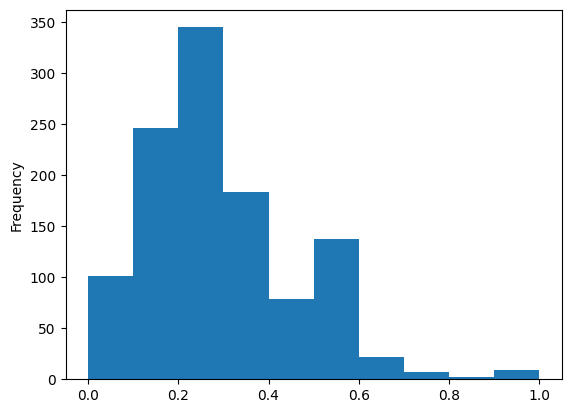

In [37]:
df_toptorsotail.v0v3_l2s_jaccard.plot.hist()

In [38]:
df_toptorsotail.sort_values('v0v3_l2s_jaccard').to_csv(
    'top_searched_queries_stats_with_v0v3_with_jaccard.csv', index=False)